In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [3]:
def compute_loss(y, y_hat):
    return -(y * np.log(y_hat) + (1-y) * np.log(1-y_hat))

## 한 개의 training data sample

In [4]:
def train_logistic_regression(x, y, learning_rate, num_epochs):
    n = x.shape[0]
    weights = np.zeros(n)
    bias = 0

    for epoch in range(num_epochs):
        z = np.dot(x, weights) + bias
        y_hat = sigmoid(z)

        loss = compute_loss(y, y_hat)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss:.4f}")

        dz = y_hat - y
        dw = x * dz
        db = dz

        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias

# 데이터 예시
x = np.array([0.1, 0.2, 0.3])
y = np.array(1)  # 1 또는 0 값

# 모델 학습
weights, bias = train_logistic_regression(x, y, learning_rate=0.01, num_epochs=1000)


Epoch 1/1000, Loss: 0.6931
Epoch 2/1000, Loss: 0.6903
Epoch 3/1000, Loss: 0.6875
Epoch 4/1000, Loss: 0.6847
Epoch 5/1000, Loss: 0.6819
Epoch 6/1000, Loss: 0.6791
Epoch 7/1000, Loss: 0.6763
Epoch 8/1000, Loss: 0.6736
Epoch 9/1000, Loss: 0.6708
Epoch 10/1000, Loss: 0.6681
Epoch 11/1000, Loss: 0.6654
Epoch 12/1000, Loss: 0.6627
Epoch 13/1000, Loss: 0.6600
Epoch 14/1000, Loss: 0.6574
Epoch 15/1000, Loss: 0.6547
Epoch 16/1000, Loss: 0.6521
Epoch 17/1000, Loss: 0.6495
Epoch 18/1000, Loss: 0.6469
Epoch 19/1000, Loss: 0.6443
Epoch 20/1000, Loss: 0.6418
Epoch 21/1000, Loss: 0.6392
Epoch 22/1000, Loss: 0.6367
Epoch 23/1000, Loss: 0.6341
Epoch 24/1000, Loss: 0.6316
Epoch 25/1000, Loss: 0.6291
Epoch 26/1000, Loss: 0.6266
Epoch 27/1000, Loss: 0.6242
Epoch 28/1000, Loss: 0.6217
Epoch 29/1000, Loss: 0.6193
Epoch 30/1000, Loss: 0.6169
Epoch 31/1000, Loss: 0.6144
Epoch 32/1000, Loss: 0.6120
Epoch 33/1000, Loss: 0.6097
Epoch 34/1000, Loss: 0.6073
Epoch 35/1000, Loss: 0.6049
Epoch 36/1000, Loss: 0.6026
E

## m개의 training data samples

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [6]:
def compute_loss(y, y_hat):
    m = y.shape[0]
    return -(1/m) * np.sum(y * np.log(y_hat) + (1-y) * np.log(1-y_hat))

In [7]:
def train_logistic_regression(X, y, learning_rate, num_epochs):
    m, n = X.shape
    weights = np.zeros((n, 1))
    bias = 0

    for epoch in range(num_epochs):
        z = np.dot(X, weights) + bias
        y_hat = sigmoid(z)

        loss = compute_loss(y, y_hat)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss:.4f}")

        dz = y_hat - y
        dw = (1/m) * np.dot(X.T, dz)
        db = (1/m) * np.sum(dz)

        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias


In [8]:
# 데이터 예시
X = np.array([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6], [0.7, 0.8, 0.9], [1.0, 1.1, 1.2]])
y = np.array([[0], [1], [0], [1]])

# 모델 학습
weights, bias = train_logistic_regression(X, y, learning_rate=0.01, num_epochs=1000)

Epoch 1/1000, Loss: 0.6931
Epoch 2/1000, Loss: 0.6930
Epoch 3/1000, Loss: 0.6928
Epoch 4/1000, Loss: 0.6926
Epoch 5/1000, Loss: 0.6925
Epoch 6/1000, Loss: 0.6923
Epoch 7/1000, Loss: 0.6922
Epoch 8/1000, Loss: 0.6920
Epoch 9/1000, Loss: 0.6918
Epoch 10/1000, Loss: 0.6917
Epoch 11/1000, Loss: 0.6915
Epoch 12/1000, Loss: 0.6914
Epoch 13/1000, Loss: 0.6912
Epoch 14/1000, Loss: 0.6911
Epoch 15/1000, Loss: 0.6909
Epoch 16/1000, Loss: 0.6908
Epoch 17/1000, Loss: 0.6906
Epoch 18/1000, Loss: 0.6905
Epoch 19/1000, Loss: 0.6903
Epoch 20/1000, Loss: 0.6902
Epoch 21/1000, Loss: 0.6900
Epoch 22/1000, Loss: 0.6899
Epoch 23/1000, Loss: 0.6897
Epoch 24/1000, Loss: 0.6896
Epoch 25/1000, Loss: 0.6894
Epoch 26/1000, Loss: 0.6893
Epoch 27/1000, Loss: 0.6892
Epoch 28/1000, Loss: 0.6890
Epoch 29/1000, Loss: 0.6889
Epoch 30/1000, Loss: 0.6888
Epoch 31/1000, Loss: 0.6886
Epoch 32/1000, Loss: 0.6885
Epoch 33/1000, Loss: 0.6884
Epoch 34/1000, Loss: 0.6882
Epoch 35/1000, Loss: 0.6881
Epoch 36/1000, Loss: 0.6880
E

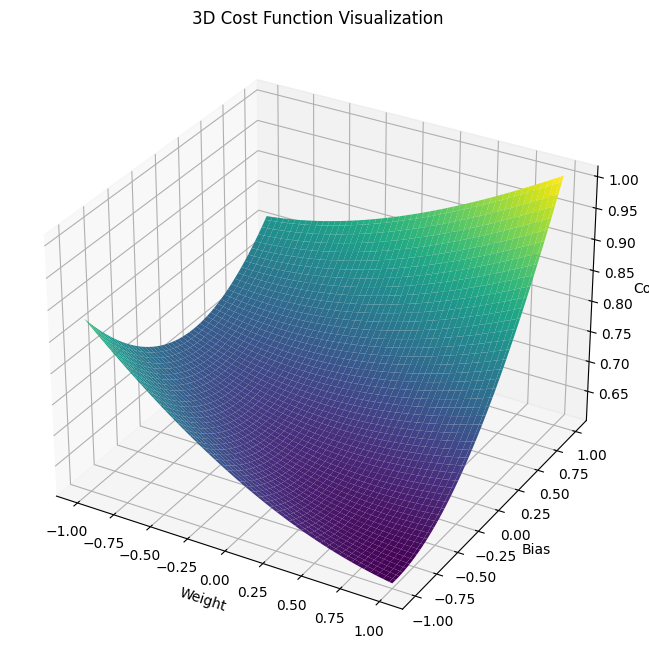

In [13]:
def plot_cost_function_3d(X, y, weights_range, bias_range, loss_function):
    W, B = np.meshgrid(weights_range, bias_range)
    Z = np.zeros(W.shape)

    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            weights_temp = np.copy(weights)
            weights_temp[0] = W[i,j]  # 첫 번째 가중치만 변경
            bias_temp = B[i,j]
            
            z = np.dot(X, weights_temp) + bias_temp
            y_hat = sigmoid(z)
            Z[i,j] = loss_function(y, y_hat)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(W, B, Z, cmap='viridis')

    ax.set_xlabel('Weight')
    ax.set_ylabel('Bias')
    ax.set_zlabel('Cost')
    ax.set_title('3D Cost Function Visualization')
    plt.show()

# 비용 함수에 대한 3D 그래프 생성
weights_range = np.linspace(-1, 1, 100)  # 가중치 범위
bias_range = np.linspace(-1, 1, 100)  # bias 범위
plot_cost_function_3d(X, y, weights_range, bias_range, compute_loss)

## Two layers. (3 units, 1 unit)

In [ ]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

def binary_crossentropy(y, y_hat):
    return -np.mean(y * np.log(y_hat) + (1-y) * np.log(1-y_hat))

def train_nn(X, y, learning_rate, epochs):
    # 초기 가중치 설정
    w1 = np.random.randn(3, 3)
    b1 = np.zeros((1, 3))
    w2 = np.random.randn(3, 1)
    b2 = np.zeros((1, 1))
    
    m = X.shape[0]

    for epoch in range(epochs):
        # Forward Propagation
        z1 = np.dot(X, w1) + b1
        a1 = sigmoid(z1)
        
        z2 = np.dot(a1, w2) + b2
        a2 = sigmoid(z2)

        loss = binary_crossentropy(y, a2)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")
        
        # Backward Propagation
        dz2 = a2 - y
        dw2 = np.dot(a1.T, dz2)
        db2 = np.sum(dz2) / m
        
        dz1 = np.dot(dz2, w2.T) * sigmoid_derivative(z1)
        dw1 = np.dot(X.T, dz1)
        db1 = np.sum(dz1) / m
        
        # Update weights and biases
        w1 -= learning_rate * dw1
        b1 -= learning_rate * db1
        
        w2 -= learning_rate * dw2
        b2 -= learning_rate * db2
        
    return w1, b1, w2, b2

# Sample data
X = np.array([[0.5, 0.6, 0.7]])
y = np.array([[1]])

# Training
w1, b1, w2, b2 = train_nn(X, y, learning_rate=0.01, epochs=1000)


## 캐싱 추가.

Z 값을 캐싱하는 주요한 이유는 backpropagation 과정에서 필요하기 때문입니다.

Backpropagation에서는 손실을 최소화하기 위해 각 파라미터에 대한 손실의 변화율(기울기)을 계산합니다. 이 때, 이전 레이어에서 계산된 Z 값에 의존하여 현재 레이어의 기울기를 계산합니다.

따라서, forward propagation 동안 계산된 Z 값을 저장해두면, 나중에 backpropagation을 수행할 때 이 값을 다시 계산할 필요가 없게 되어 계산 효율성이 향상됩니다.

In [ ]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy(y_true, y_pred):
    m = y_true.shape[1]
    cost = -1/m * (np.dot(y_true, np.log(y_pred).T) + np.dot(1 - y_true, np.log(1 - y_pred).T))
    return np.squeeze(cost)

def forward_propagation(X, params):
    W1, b1, W2, b2, W3, b3, W4, b4 = params['W1'], params['b1'], params['W2'], params['b2'], params['W3'], params['b3'], params['W4'], params['b4']

    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)

    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    Z4 = np.dot(W4, A3) + b4
    A4 = sigmoid(Z4)

    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3, Z4, A4, W4, b4)
    return A4, cache

def backpropagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3, Z4, A4, W4, b4) = cache
    
    dZ4 = A4 - Y
    dW4 = 1/m * np.dot(dZ4, A3.T)
    db4 = 1/m * np.sum(dZ4, axis=1, keepdims=True)

    dA3 = np.dot(W4.T, dZ4)
    dZ3 = dA3 * A3 * (1-A3)
    dW3 = 1/m * np.dot(dZ3, A2.T)
    db3 = 1/m * np.sum(dZ3, axis=1, keepdims=True)

    dA2 = np.dot(W3.T, dZ3)
    dZ2 = dA2 * A2 * (1-A2)
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * A1 * (1-A1)
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)

    gradients = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2, "dW3": dW3, "db3": db3, "dW4": dW4, "db4": db4}
    return gradients


def initialize_parameters(input_dim, hidden_dims, output_dim):
    np.random.seed(42)
    W1 = np.random.randn(hidden_dims[0], input_dim) * 0.01
    b1 = np.zeros((hidden_dims[0], 1))
    
    W2 = np.random.randn(hidden_dims[1], hidden_dims[0]) * 0.01
    b2 = np.zeros((hidden_dims[1], 1))
    
    W3 = np.random.randn(hidden_dims[2], hidden_dims[1]) * 0.01
    b3 = np.zeros((hidden_dims[2], 1))
    
    W4 = np.random.randn(output_dim, hidden_dims[2]) * 0.01
    b4 = np.zeros((output_dim, 1))

    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3, "W4": W4, "b4": b4}
    return parameters

def update_parameters(parameters, gradients, learning_rate):
    parameters["W1"] -= learning_rate * gradients["dW1"]
    parameters["b1"] -= learning_rate * gradients["db1"]
    parameters["W2"] -= learning_rate * gradients["dW2"]
    parameters["b2"] -= learning_rate * gradients["db2"]
    parameters["W3"] -= learning_rate * gradients["dW3"]
    parameters["b3"] -= learning_rate * gradients["db3"]
    parameters["W4"] -= learning_rate * gradients["dW4"]
    parameters["b4"] -= learning_rate * gradients["db4"]
    return parameters

def train_nn(X, Y, hidden_dims, num_iterations=10000, learning_rate=0.01):
    input_dim = X.shape[0]
    output_dim = Y.shape[0]
    
    parameters = initialize_parameters(input_dim, hidden_dims, output_dim)
    for i in range(num_iterations):
        # Forward Propagation
        A4, cache = forward_propagation(X, parameters)
        
        # Cost computation
        cost = binary_cross_entropy(Y, A4)
        
        # Backward Propagation
        gradients = backpropagation(X, Y, cache)
        
        # Update parameters
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        # Print the cost every 1000 iterations
        if i % 1000 == 0:
            print(f"Cost after iteration {i}: {cost}")
    return parameters
